# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

In the Capstone Project, I will try to scrape historical data on Etherium coins from the coinecko site.
coinecko is a web-based platform that provides information regarding the market price of crypto currency tokens
which is used as a useful comparison tool for crypto currency token investments,
With the aim of increasing online cryptocurrency participants and understanding the fundamentals that drive the crypto market.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [22]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [23]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [24]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | 


## Finding the right key to scrap the data & Extracting the right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

for scraping existing data on the website, we must first find the key, by inspecting element (development mode)
on the website as shown in the image below.

<img src="assets/Coingecko.png">

The information that we need are the month and the inflation rate each month, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this. 

the information we need for scraping is html text that wraps around the whole data we want to pull,
in this case I want to retrieve the data in the historical etherium table.

if we look at the inspect element `<tbody>` is the html text that wraps all the tables we want to drag, let's try
use the `find` function to take a deeper look.

In [25]:
table = soup.find('tbody', attrs={})
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


after we use `find('tbody', attrs={})` method, we will see that date data is wrapped with `th class="font-semibold text-center" scope="row"` and volume data is wrapped with ` td class="text-center"`.

this will be a problem if we want to retrieve only volume data, because 'market cap' , 'open', 'close' data are also wrapped in `td class="text-center"`.

Before solving the problem above, I will calculate the number of rows to determine the iteration for the append data that we pull with the `len()` and `find_all()`. `find_all` is used for finding out all tags with the specified tag name or id and returning them as a list of type bs4.function.

In [26]:
table.find_all('th', attrs={'class':'font-semibold text-center','scope':'row'})

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>,
 <th class="font-semibold text-center" scope="row">2021-06-25</th>,
 <th class="font-semibold text-center" scope="row">2021-06-24</th>,
 <th class="font-semibold text-center" scope="row">2021-06-23</th>,
 <th class="font-semibold text-center" scope="row">2021-06-22</th>,
 <th class="font-semibold text-center" scope="row">2021-06-21</th>,
 <th class="font-semibold text-center" scope="row">2021-06-20</th>,
 <th class="font-semibold text-center" scope="row">2021-06-19</th>,
 <th class="font-semibold text-center" scope="row">2021-06-18</th>,
 <th class="font-semibold text-center" scope="row">2021-06-17</th>,
 <th class="font-semibold text-center" scope="ro

Finding row length.

In [27]:
row = table.find_all('th', attrs={'class':'font-semibold text-center','scope':'row'})
row_length = len(row)
row_length

547

Now that we know the length of our data, here is what we will do for the iteration process.

This is what the loop does to remove information:

- First, we need to create placeholders to receive the information we are scraping.
- i named my placeholder `temp` and it is a list.
- Then we will make a loop from one to the length of the table row,
- as I mentioned above, it will be a data oddity if you only take volume data because it has the same wrapping as market cap etc,,.
- what I did was to use the if and else function to adjust the index of the data column to be retrieved`(volume)`.
- Then we will add it to our tuple which we prepared earlier,
- every one iteration we will delete one table row.

In [45]:
temp = [] #init

for i in range(0, row_length):
    
    #get date 
    period = table.find_all('th', attrs={'class':'font-semibold text-center','scope':'row'})[i].text
    
    #get volume
    volume = table.find_all('td', attrs={'class':'text-center'})[4*i+1].text.replace('$','').replace(',','')
    volume = volume.strip() #to remove excess white space
    
    temp.append((period,volume)) 
    
temp[:500]

[('2021-06-30', '27149143847'),
 ('2021-06-29', '30629329806'),
 ('2021-06-28', '24316408028'),
 ('2021-06-27', '24249510321'),
 ('2021-06-26', '25981381067'),
 ('2021-06-25', '22447489242'),
 ('2021-06-24', '28098744045'),
 ('2021-06-23', '38755019937'),
 ('2021-06-22', '39499960408'),
 ('2021-06-21', '26235850447'),
 ('2021-06-20', '20456963375'),
 ('2021-06-19', '26204484921'),
 ('2021-06-18', '25708624827'),
 ('2021-06-17', '26150320395'),
 ('2021-06-16', '26803957680'),
 ('2021-06-15', '28128172338'),
 ('2021-06-14', '29382118964'),
 ('2021-06-13', '28235882062'),
 ('2021-06-12', '26751786966'),
 ('2021-06-11', '33075957437'),
 ('2021-06-10', '43973432438'),
 ('2021-06-09', '48344195674'),
 ('2021-06-08', '37385872210'),
 ('2021-06-07', '29050162249'),
 ('2021-06-06', '34731979705'),
 ('2021-06-05', '39996583175'),
 ('2021-06-04', '38104663185'),
 ('2021-06-03', '39148856525'),
 ('2021-06-02', '39898648753'),
 ('2021-06-01', '44445830388'),
 ('2021-05-31', '37392021394'),
 ('2021-

## Creating data frame & Data wrangling

Put the array into dataframe

In [49]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period', 'volume'))
df.head()

,period,volume
0,2021-06-30,27149143847
1,2021-06-29,30629329806
2,2021-06-28,24316408028
3,2021-06-27,24249510321
4,2021-06-26,25981381067


before creating a visualization, we need to check the data type and `null` value in our data so that there are no anomalies in the visualization.

In [51]:
df['period'] = df['period'].astype('datetime64')
df['volume'] = df['volume'].astype('int64')

df.dtypes

period    datetime64[ns]
volume             int64
dtype: object

In [42]:
df.isna().sum()

period    0
volume    0
dtype: int64

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use set_index()

In [53]:
df = df.set_index('period')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='period'>

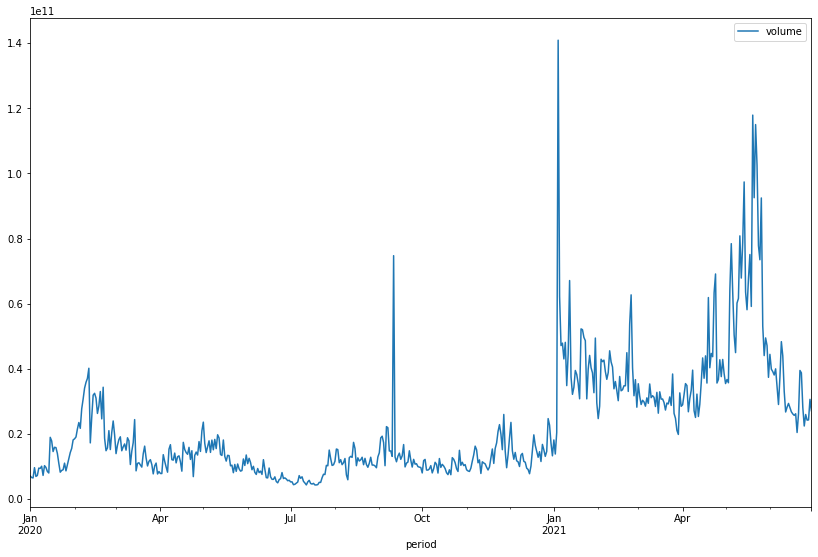

In [55]:
df.plot(figsize=(14,9))

I will try to describe the analysis based on the graph shown from the results of data collection:
- The highest spike in increase occurred in January 2021 and decreased at the end of January January 2021, for the reason I have not received further information but it has been confirmed that the increase is due to the rapidly increasing demand for etherium usage.
- The highest price increase in 2020 occurred in the vulnerable month of September, but declined again in October
- there is a slow increase from April 2021 - May 2021
- based on the previous point that alluded to the increase in April 2021 - May 2021, based on the information I searched on the internet the increase in etherium was due to the NFT based crypto game, Axie Infinity, slowly increasing demand, which at that time was very booming and trending in the Philippines and Axie Infinity is a block chain game that runs on the etherium mainnet network so that every transaction made on the network requires etherium. increasing demand will affect the basic law of economics, namely supply and demand, which of course will also affect the volume of prices at that time.


`note: all the statements that I made are not necessarily true because I have to find more detailed info, this analysis is only for learning in the algorithm class`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.